In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from sympy import *

In [6]:
m, n = 10, 3

#create data
X = np.random.randn(m, n) # design matrix
y = np.random.randn(m, 1) # outcome measures

np.shape(y)

(10, 1)

In [8]:
# try directly applying rref
Xy = Matrix(np.concatenate([X,y], axis = 1))
print(Xy.rref())

(Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]]), (0, 1, 2, 3))


In [11]:
# reapply to the normal equations
XtX = X.T@X
Xty = X.T@y
normEQ = Matrix(np.concatenate([XtX,Xty], axis = 1))

Xsol = normEQ.rref()
Xsol = Xsol[0]
beta = Xsol[:, -1]

print(np.array(Xsol)), print("")
print(beta), print(" ")

#compare to left-inverse
beta2 = np.linalg.inv(XtX) @ Xty
print(beta2), print("")

# and with the python solver
beta3 = np.linalg.solve(XtX, Xty)
print(beta3)

[[1 0 0 -1.02110320484015]
 [0 1 0 0.374499426374755]
 [0 0 1 -0.246381698996755]]

Matrix([[-1.02110320484015], [0.374499426374755], [-0.246381698996755]])
 
[[-1.0211032 ]
 [ 0.37449943]
 [-0.2463817 ]]

[[-1.0211032 ]
 [ 0.37449943]
 [-0.2463817 ]]


In [17]:
# least squrare application for average
data = np.array([[-4, 0, -3, 1, 2, 8, 5, 8]]).T
N = len(data)

#design matrix
X = np.ones([N, 1])

# fir the model
b = np.linalg.solve(X.T@X, X.T@data)

# compare against the mean

m = np.mean(data)

print(b, m)
print(X)

[[2.125]] 2.125
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


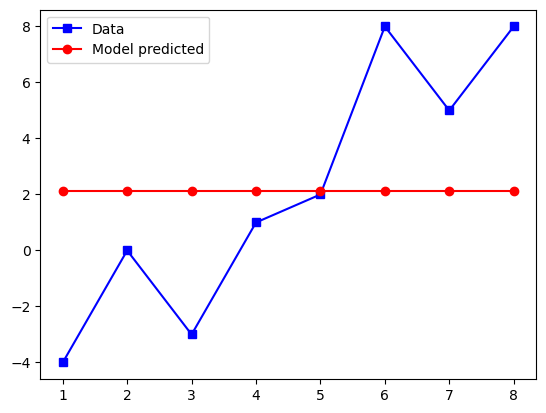

In [19]:
# compute the model-predicted values
yHat = X@b

plt.plot(np.arange(1, N+1), data, "bs-", label="Data")
plt.plot(np.arange(1, N+1), yHat, "ro-", label="Model predicted")

plt.legend()
plt.show()

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]]


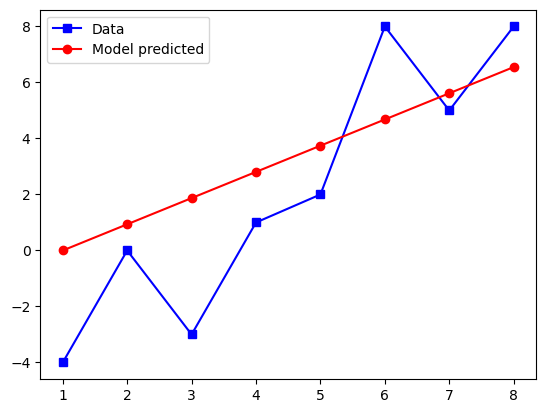

In [21]:
# new design matrix
X = np.array([np.arange(0, N)]).T
print(X)

#fit the model
b = np.linalg.solve(X.T@X, X.T@data)
yHat = X@b

#plot
plt.plot(np.arange(1, N+1), data, "bs-", label="Data")
plt.plot(np.arange(1, N+1), yHat, "ro-", label="Model predicted")

plt.legend()
plt.show()

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]]


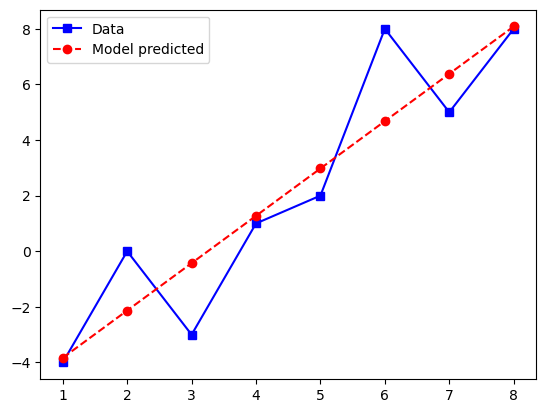

In [31]:
# new design matrix
X = np.concatenate([np.ones([N,1]), np.array([np.arange(0, N)]).T], axis= 1)
print(X)

#fit the model
b = np.linalg.solve(X.T@X, X.T@data)
yHat = X@b

#plot
plt.plot(np.arange(1, N+1), data, "bs-", label="Data")
plt.plot(np.arange(1, N+1), yHat, "ro--", label="Model predicted")

plt.legend()
plt.show()

[[ 1.  0.]
 [ 1.  1.]
 [ 1.  4.]
 [ 1.  9.]
 [ 1. 16.]
 [ 1. 25.]
 [ 1. 36.]
 [ 1. 49.]]


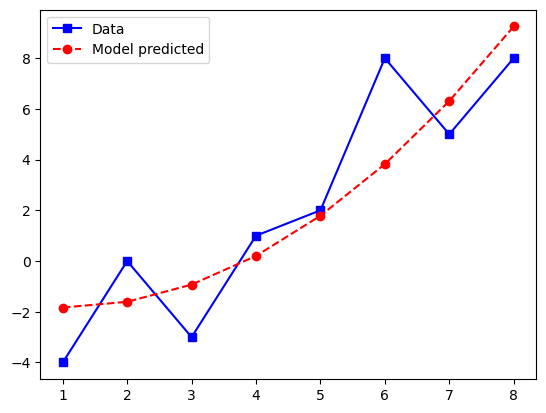

In [30]:
# with nonlinearity in the design matrix
# new design matrix
X = np.concatenate([np.ones([N,1]), np.array([np.arange(0, N)**2]).T], axis= 1)
print(X)

#fit the model
b = np.linalg.solve(X.T@X, X.T@data)
yHat = X@b

#plot
plt.plot(np.arange(1, N+1), data, "bs-", label="Data")
plt.plot(np.arange(1, N+1), yHat, "ro--", label="Model predicted")

plt.legend()
plt.show()